## Resnet 50

In [1]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#data sugmentation
# Preprocessing the Training set
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.15)

training_set = datagen.flow_from_directory('concrete_cracked_images/train',
                                                 target_size=(224,224),
                                                    color_mode="rgb",
                                                    subset="training",
                                                    class_mode="binary",
                                                    batch_size=32,
                                                    shuffle=True)

Found 24411 images belonging to 2 classes.


In [3]:
valid_generator=datagen.flow_from_directory(
                                                directory="concrete_cracked_images/train",
                                                target_size=(224,224),
                                                color_mode="rgb",
                                                subset="validation",
                                                class_mode="binary",
                                                batch_size=32,
                                                shuffle=True)

Found 4307 images belonging to 2 classes.


In [4]:
## showing some image from training
import matplotlib.pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

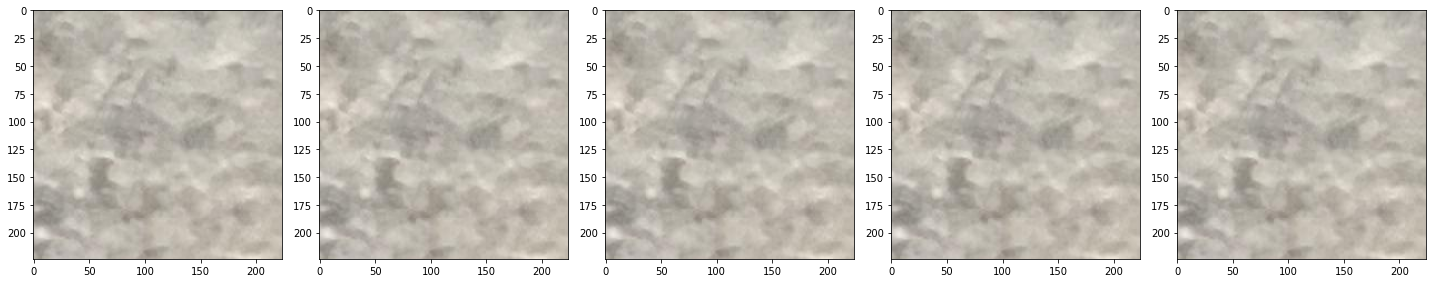

In [5]:
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

## resnet50

In [6]:
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout,AveragePooling2D
from tensorflow.keras.applications.resnet import ResNet50
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3,DenseNet201,ResNet152V2,EfficientNetB7, MobileNetV2,Xception,ResNet101V2
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import Model
from keras.models import Sequential
from keras.regularizers import *
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
data_augmentation = keras.Sequential(
[
tf.keras.layers.experimental.preprocessing.CenterCrop(224,224),
]
)

In [8]:
resnet=ResNet50(weights="imagenet",)

In [9]:
x=resnet.layers[-2].output
fc1=Dense(1,activation='sigmoid',kernel_initializer='glorot_uniform', kernel_regularizer=l2(.0005))(x)
my_model=Model(inputs=resnet.input,outputs=fc1)

In [10]:
my_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
# Part 3 - Training the CNN
# Compiling the CNN
my_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

In [13]:
# Training the CNN on the Training set and evaluating it on the Test set
history = my_model.fit(x = training_set, validation_data = valid_generator, epochs = 1,validation_steps=STEP_SIZE_VALID,
                      steps_per_epoch=STEP_SIZE_TRAIN,)